Name: Josephine Ekenya
Course: BUDT704
Section: 0501
Date: 10/20/2023

In [340]:
# import statements to import the libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
# reading the excel file
companies = pd.read_excel('HW4_inc5000-2018.xlsx', index_col='RANK')
# a count of all the companies on the list

#print the count of all unique company names
print(f'The total number of companies on the list is: {companies["COMPANY NAME"].nunique()}')
total_companies = companies["COMPANY NAME"].nunique()

The total number of companies on the list is: 5000


In [342]:
#companies ranked within the top 25
companies.head(25)

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY.1,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,"CITY, STATE",Unnamed: 14,Unnamed: 15
RANK,,,,,,,,,,,,,,,
1,https://www.inc.com/profile/swanleap,Madison,75660.8425,49,SwanLeap,http://swanleap.com,Wisconsin,WI,98965631,53719,2013.0,Logistics & Transportation,"Madison, WI",Makes software for the logistics industry that...,During stints as a freight broker and shipping...
2,https://www.inc.com/profile/popsockets,Boulder,71423.7620,118,PopSockets,http://popsockets.com,Colorado,CO,168837562,80301,2010.0,Consumer Products & Services,"Boulder, CO","Makes self-adhesive, collapsible, expandable c...",Frustrated with his iPhone headphones getting ...
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,Illinois,IL,255047839,60611,2013.0,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI",NaN,NaN
4,https://www.inc.com/profile/velocity-global,Denver,39816.5093,55,Velocity Global,http://velocityglobal.com,Colorado,CO,49175942,80205,2013.0,Business Products & Services,"Denver-Aurora-Lakewood, CO",NaN,NaN
5,https://www.inc.com/profile/depcom-power,Scottsdale,38962.9022,104,DEPCOM Power,depcompower.com,Arizona,AZ,219574136,85258,2013.0,Energy,"Phoenix-Mesa-Scottsdale, AZ",NaN,NaN
6,https://www.inc.com/profile/aeronux-airways,Marietta,20005.2390,17,Aeronux Airways,aeronux.com,Georgia,GA,21874500,30066,2011.0,Logistics & Transportation,"Atlanta-Sandy Springs-Roswell, GA",NaN,NaN
7,https://www.inc.com/profile/diamond-assets,Milton,19717.5129,41,Diamond Assets,diamond-assets.com,Wisconsin,WI,43084462,53563,2014.0,Computer Hardware,"Janesville, WI",NaN,NaN
8,https://www.inc.com/profile/gforce-life-sciences,Chicago,16426.6575,13,GForce Life Sciences,http://gforcestaff.com,Illinois,IL,16893384,60606,2013.0,Human Resources,"Chicago-Naperville-Elgin, IL-IN-WI",NaN,NaN
8,https://www.inc.com/profile/flexport,San Francisco,15911.2237,532,Flexport,http://flexport.com,California,CA,224745864,94102,2013.0,Logistics & Transportation,"San Francisco-Oakland-Hayward, CA",NaN,NaN


# Modification #1 -> Remove uninformative/unnecessary columns

Looking at the data frame, there are two columns labeled "Unnamed: 14" and "Unnamed: 15" that lack meaningful information, and don't provide any valuable insights. These columns are not only ambiguously named but are also populated with NaN values, offering little information. For example, for the first two data points, columns "Unnamed: 14" and "Unnamed: 15" appear to provide descriptions about the companies, however, this information is only provided for the first two companies. For all the other companies, these two columns have NaN values, thus, from a data science stands, these columns hold little to no value. To achieve tidy data and improve the dataset's usefulness, I will remove these columns which will allow for better analysis.

Another thing noticed about the data frame is that there appears to be 2 city columns, one labled "CITY" which has the city of the companies, and the other named "CITY.1" which unlike the name suggest provides the state location of the company and not the city. The column name on its own is misleading. Additionally, there is a column labled "STATE" that provides the state location of each company as an abbreviation. Therefore, the information provided in column "CITY.1" is not only misleading per the column name vs the actual information presented within the column, but it is repetative. So the CITY1 column will be removed as well. 

In [201]:
# drop columns that provide little to no valuable information
companies.drop(["Unnamed: 14", "Unnamed: 15", "CITY.1"], axis=1, inplace=True)
companies

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,"CITY, STATE"
RANK,,,,,,,,,,,,
1,https://www.inc.com/profile/swanleap,Madison,75660.8425,49,SwanLeap,http://swanleap.com,WI,98965631,53719,2013.0,Logistics & Transportation,"Madison, WI"
2,https://www.inc.com/profile/popsockets,Boulder,71423.7620,118,PopSockets,http://popsockets.com,CO,168837562,80301,2010.0,Consumer Products & Services,"Boulder, CO"
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,IL,255047839,60611,2013.0,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI"
4,https://www.inc.com/profile/velocity-global,Denver,39816.5093,55,Velocity Global,http://velocityglobal.com,CO,49175942,80205,2013.0,Business Products & Services,"Denver-Aurora-Lakewood, CO"
5,https://www.inc.com/profile/depcom-power,Scottsdale,38962.9022,104,DEPCOM Power,depcompower.com,AZ,219574136,85258,2013.0,Energy,"Phoenix-Mesa-Scottsdale, AZ"
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,https://www.inc.com/profile/pentec-health,Glen Mills,57.3485,580,Pentec Health,pentechealth.com,PA,160781213,19342,1983.0,Health,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD"
4997,https://www.inc.com/profile/progressive-freight,Thomasville,57.3364,12,Progressive Freight,progressivefreight.com,GA,10728626,31799,2003.0,Logistics & Transportation,"Thomasville, GA"
4998,https://www.inc.com/profile/traffic-planning-a...,Pottstown,57.2994,160,"Traffic Planning and Design, Inc.",trafficpd.com,PA,18215073,19464,1989.0,Engineering,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD"


# Modification #2 -> Improve naming convention 

Apart from removing redundant or unnecessary data, another improvement to the data frame's tidiness would involve renaming the "CITY, STATE" column to "METRO AREA." The current naming convention, "CITY,STATE," might mislead a data analyst into assuming it contains individual city and state data for each company. However, a closer look at the data reveals that the separate "CITY" and "STATE" columns already provide this information, making the "CITY, STATE" column name appear redundant.

Furthermore, the "CITY, STATE" column offers more than just city and state details; it appears to specify the metropolitan area or nearby densely populated region for each company. For instance, although "Home Chef" is based in Chicago, IL, the "CITY, STATE" entry indicates that it belongs to the "Chicago-Naperville-Elgin, IL-IN-WI" metropolitan area. To accurately represent this broader geographical information, renaming the column to "METRO AREA" would offer a clearer description, avoiding confusion on the iformation presented within that column. This simple adjustment is significant because it will ensure that the data frame is not only tidy but is also easy to interpret for effective analysis.

In [202]:
#updating coulmn name to improve naming convention and reduce misleading lable names
companies.rename(columns={"CITY, STATE": "METRO AREA"}, inplace=True)
companies

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,METRO AREA
RANK,,,,,,,,,,,,
1,https://www.inc.com/profile/swanleap,Madison,75660.8425,49,SwanLeap,http://swanleap.com,WI,98965631,53719,2013.0,Logistics & Transportation,"Madison, WI"
2,https://www.inc.com/profile/popsockets,Boulder,71423.7620,118,PopSockets,http://popsockets.com,CO,168837562,80301,2010.0,Consumer Products & Services,"Boulder, CO"
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,IL,255047839,60611,2013.0,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI"
4,https://www.inc.com/profile/velocity-global,Denver,39816.5093,55,Velocity Global,http://velocityglobal.com,CO,49175942,80205,2013.0,Business Products & Services,"Denver-Aurora-Lakewood, CO"
5,https://www.inc.com/profile/depcom-power,Scottsdale,38962.9022,104,DEPCOM Power,depcompower.com,AZ,219574136,85258,2013.0,Energy,"Phoenix-Mesa-Scottsdale, AZ"
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,https://www.inc.com/profile/pentec-health,Glen Mills,57.3485,580,Pentec Health,pentechealth.com,PA,160781213,19342,1983.0,Health,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD"
4997,https://www.inc.com/profile/progressive-freight,Thomasville,57.3364,12,Progressive Freight,progressivefreight.com,GA,10728626,31799,2003.0,Logistics & Transportation,"Thomasville, GA"
4998,https://www.inc.com/profile/traffic-planning-a...,Pottstown,57.2994,160,"Traffic Planning and Design, Inc.",trafficpd.com,PA,18215073,19464,1989.0,Engineering,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD"


In [203]:
# reading the states by region file
logistics = pd.read_csv('HW4_states_by_region.csv')
logistics

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


# Creating and populating a REGION column

With the knowledge that the STATE column in the companies data frame contains the same information as the State Code column in the region data frame, a new Region column can be created in the companies data frame by treating the the State Code column as a key and mapping the State column to the State Code column to populate the region column.

In [204]:
# use the state column and the state code column to get the region column and populate the new region column
companies["REGION"] = companies["STATE"].map(logistics.set_index("State Code")["Region"])
companies


,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,METRO AREA,REGION
RANK,,,,,,,,,,,,,
1,https://www.inc.com/profile/swanleap,Madison,75660.8425,49,SwanLeap,http://swanleap.com,WI,98965631,53719,2013.0,Logistics & Transportation,"Madison, WI",Midwest
2,https://www.inc.com/profile/popsockets,Boulder,71423.7620,118,PopSockets,http://popsockets.com,CO,168837562,80301,2010.0,Consumer Products & Services,"Boulder, CO",West
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,IL,255047839,60611,2013.0,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI",Midwest
4,https://www.inc.com/profile/velocity-global,Denver,39816.5093,55,Velocity Global,http://velocityglobal.com,CO,49175942,80205,2013.0,Business Products & Services,"Denver-Aurora-Lakewood, CO",West
5,https://www.inc.com/profile/depcom-power,Scottsdale,38962.9022,104,DEPCOM Power,depcompower.com,AZ,219574136,85258,2013.0,Energy,"Phoenix-Mesa-Scottsdale, AZ",West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,https://www.inc.com/profile/pentec-health,Glen Mills,57.3485,580,Pentec Health,pentechealth.com,PA,160781213,19342,1983.0,Health,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Northeast
4997,https://www.inc.com/profile/progressive-freight,Thomasville,57.3364,12,Progressive Freight,progressivefreight.com,GA,10728626,31799,2003.0,Logistics & Transportation,"Thomasville, GA",South
4998,https://www.inc.com/profile/traffic-planning-a...,Pottstown,57.2994,160,"Traffic Planning and Design, Inc.",trafficpd.com,PA,18215073,19464,1989.0,Engineering,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Northeast


In [205]:
# Descriptive statistics for Revenue
companies['REVENUW'].describe()

count    5.000000e+03
mean     4.122126e+07
std      2.829903e+08
min      1.952209e+06
25%      4.480684e+06
50%      9.575010e+06
75%      2.497803e+07
max      1.643321e+10
Name: REVENUW, dtype: float64

In [206]:
# getting the min of Revenue in dollar representation
print(f'min revenue is ${companies["REVENUW"].min():,.2f}')
# getting the max of Revenue in dollar representation
print(f'max revenue is ${companies["REVENUW"].max():,.2f}')
# getting the median of Revenue in dollar representation
print(f'median revenue is ${companies["REVENUW"].median():,.2f}')
# getting the standard deviation of Revenue
print(f'standard deviation for revenue is {companies["REVENUW"].std():.2f}')


min revenue is $1,952,209.00
max revenue is $16,433,210,000.00
median revenue is $9,575,009.50
standard deviation for revenue is 282990264.70


# What percentage of companies founded prior to 2015 have achieved revenue of at least $50 million?
To get the percentage of companies founded prior to 2015 that have achieved revenue of at least $50 million, a good approach will be to firstly generate a data frame with only companies that were founded before 2015 and have a revenue of at least $50 million. Then get the percentage of those companies in comparison to the total unique companies on the list, to see the percentage of companies that made a revenue of atleast $50 million, only being founded in 2015.

In [314]:
# create a filter for only companies founded before 2015 and have a revenue of
# at least 50,000,000
# get the year
year = int(input('Enter year '))
# get the revenue
revenue =int(input('Enter revenue '))
filt = (companies["FOUNDED"] < year) & (companies["REVENUW"] >= revenue)

# get the number of companies that were founded prior to 2015 with a revenue of 
# at least $50,000,000
b4_twenty15 = companies[filt]["COMPANY NAME"].nunique()

# get the percentage of companies founded prior to 2015 that have achieved revenue of at least
# 50 million
percentage = (b4_twenty15/total_companies) * 100

print(f'from the list, %{percentage:.2f} of the companies founded prior to 2015 have acheived revenue of at least ${revenue:,.2f}')

Enter year 2015
Enter revenue 50000000
from the list, %13.62 of the companies founded prior to 2015 have acheived revenue of at least $50,000,000.00


# Q4. Inference -> 2010's Rise in e-commerce and online retail

We know that there was a rise in online shopping amid the COVID-19 pandemic as the safety precautions put in place by the pandemic forced people into a more digital lifestyle. With so many brick-and-mortar businesses shutting down, one can assume that the shift to a more digital world was seen through the rise of online shopping as a lot of companies were force to develop an online presence. However, the surge in online shopping might have started before the pandemic. SwanLeap, a logistics and transportation software company, ranked number 1 on the Inc. 5000 list of fastest-growing American companies in 2018, despite being founded just in 2013. Their rapid growth hints at a broader trend. SwanLeap specializes in software that aids companies in planning and executing various shipments, reflecting the growing need for efficient logistics solutions.

SwanLeap's top placement on the fastest-growing companies list suggests a rising trend in online shopping during the 2010s. As more businesses embraced e-commerce, they turned to logistics and transportation software to enhance their shipping processes. The rise in online shopping led many companies to rely on logistic and transportation software to acquire a deep understanding of shipping data and routes to meet customer demands effectively. SwanLeap's success suggest industry demand for their software, highlighting the increasing demand for improved logistics and shipment management due to the rising online retail.



In [329]:
def top_revenue(df, category= None, value= None, n= 10):
    # if the category and value is provided, return a data frame containing the top 
    # n rows of companies with that value in that category based on
    # revenue
    if category != None and value != None:
        # check if the specified category exist in the data frame
        if category in df.columns:
            # filter to get value of category
            filt = (df[category] == value)
            # return the n top rows of companies based on revenue
            return df[filt].nlargest(n, columns= "REVENUW")
        # if the category is provided, get the top revenue companies for just that category
    elif category != None:
        return df[category].nlargets(n, columns= "REVENUW")
    else:
        # return the top n companies overall (rank placement) if both the category and value aren't provided
        return df.head(n)
        

In [330]:
#tester function to get the top 10 companies founded in 2013 by revenue
top_revenue(companies, category= 'FOUNDED', value= 2013, n= 10)

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,METRO AREA,REGION
RANK,,,,,,,,,,,,,
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,IL,255047839,60611,2013.0,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI",Midwest
8,https://www.inc.com/profile/flexport,San Francisco,15911.2237,532,Flexport,http://flexport.com,CA,224745864,94102,2013.0,Logistics & Transportation,"San Francisco-Oakland-Hayward, CA",West
5,https://www.inc.com/profile/depcom-power,Scottsdale,38962.9022,104,DEPCOM Power,depcompower.com,AZ,219574136,85258,2013.0,Energy,"Phoenix-Mesa-Scottsdale, AZ",West
1782,https://www.inc.com/profile/arcis-golf,Dallas,253.8615,3400,Arcis Golf,arcisgolf.com,TX,188341778,75244,2013.0,Travel & Hospitality,"Dallas-Fort Worth-Arlington, TX",South
3048,https://www.inc.com/profile/eagle-pipe,Houston,131.7359,14,Eagle Pipe,eaglepipe.net,TX,139796272,77024,2013.0,Energy,"Houston-The Woodlands-Sugar Land, TX",South
3616,https://www.inc.com/profile/americorp-the-matt...,Chicago,102.9335,6,Americorp-The Matt Laricy Group,mattlaricygroup.com,IL,139050000,60654,2013.0,Real Estate,"Chicago-Naperville-Elgin, IL-IN-WI",Midwest
673,https://www.inc.com/profile/sparks-energy,Danville,742.3920,25,Sparks Energy,sparksinc.com,AL,127090146,35619,2013.0,Energy,"Decatur, AL",South
141,https://www.inc.com/profile/iserve,Lehi,2914.7937,44,iServe,iserve.com,UT,121332000,84043,2013.0,Advertising & Marketing,"Provo-Orem, UT",West
1845,https://www.inc.com/profile/exiger,New York City,243.6004,403,Exiger,exiger.com,NY,99280615,10036,2013.0,Business Products & Services,"New York-Newark-Jersey City, NY-NJ-PA",Northeast


In [331]:
# Using the previously created function to create a data frame for the top fifteen companies overall
top_revenue(companies, n= 16)

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,METRO AREA,REGION
RANK,,,,,,,,,,,,,
1,https://www.inc.com/profile/swanleap,Madison,75660.8425,49,SwanLeap,http://swanleap.com,WI,98965631,53719,2013.0,Logistics & Transportation,"Madison, WI",Midwest
2,https://www.inc.com/profile/popsockets,Boulder,71423.7620,118,PopSockets,http://popsockets.com,CO,168837562,80301,2010.0,Consumer Products & Services,"Boulder, CO",West
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,IL,255047839,60611,2013.0,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI",Midwest
4,https://www.inc.com/profile/velocity-global,Denver,39816.5093,55,Velocity Global,http://velocityglobal.com,CO,49175942,80205,2013.0,Business Products & Services,"Denver-Aurora-Lakewood, CO",West
5,https://www.inc.com/profile/depcom-power,Scottsdale,38962.9022,104,DEPCOM Power,depcompower.com,AZ,219574136,85258,2013.0,Energy,"Phoenix-Mesa-Scottsdale, AZ",West
6,https://www.inc.com/profile/aeronux-airways,Marietta,20005.2390,17,Aeronux Airways,aeronux.com,GA,21874500,30066,2011.0,Logistics & Transportation,"Atlanta-Sandy Springs-Roswell, GA",South
7,https://www.inc.com/profile/diamond-assets,Milton,19717.5129,41,Diamond Assets,diamond-assets.com,WI,43084462,53563,2014.0,Computer Hardware,"Janesville, WI",Midwest
8,https://www.inc.com/profile/gforce-life-sciences,Chicago,16426.6575,13,GForce Life Sciences,http://gforcestaff.com,IL,16893384,60606,2013.0,Human Resources,"Chicago-Naperville-Elgin, IL-IN-WI",Midwest
8,https://www.inc.com/profile/flexport,San Francisco,15911.2237,532,Flexport,http://flexport.com,CA,224745864,94102,2013.0,Logistics & Transportation,"San Francisco-Oakland-Hayward, CA",West


In [332]:
# create a data frame of the top 10 companies in the food and beverage industry
top_revenue(companies, category= "INDUSTRY", value= "Food & Beverage", n= 10)

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,METRO AREA,REGION
RANK,,,,,,,,,,,,,
3757,https://www.inc.com/profile/jersey-mikes-subs,Manasquan,97.4898,19000,Jersey Mike's Subs,jerseymikes.com,NJ,974782877,8736,1956.0,Food & Beverage,"New York-Newark-Jersey City, NY-NJ-PA",Northeast
3483,https://www.inc.com/profile/monogram-foods,Memphis,108.5890,2700,Monogram Foods,monogramfoods.com,TN,670665838,38117,2004.0,Food & Beverage,"Memphis, TN",South
998,https://www.inc.com/profile/gps-hospitality,Atlanta,493.1933,11016,GPS Hospitality,gpshospitality.com,GA,551176689,30328,2012.0,Food & Beverage,"Atlanta-Sandy Springs-Roswell, GA",South
3434,https://www.inc.com/profile/freddys-frozen-cus...,Wichita,111.0822,11886,Freddy's Frozen Custard & Steakburgers,freddysusa.com,KS,410993763,67206,2002.0,Food & Beverage,"Wichita, KS",Midwest
4061,https://www.inc.com/profile/blount-fine-foods,Fall River,86.0419,628,Blount Fine Foods,blountfinefoods.com,MA,338254000,1760,1946.0,Food & Beverage,"Boston-Cambridge-Newton, MA-NH",Northeast
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,IL,255047839,60611,2013.0,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI",Midwest
3537,https://www.inc.com/profile/coopers-hawk-winer...,Countryside,106.4360,4155,Cooper's Hawk Winery & Restaurants,chwinery.com,IL,241827341,60525,2005.0,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI",Midwest
2436,https://www.inc.com/profile/nothing-bundt-cakes,Addison,177.5477,230,Nothing Bundt Cakes,nothingbundtcakes.com,TX,220026175,75001,1997.0,Food & Beverage,"Dallas-Fort Worth-Arlington, TX",South
515,https://www.inc.com/profile/mod-pizza,Bellevue,979.4089,5500,MOD Pizza,modpizza.com,WA,219487000,98008,2008.0,Food & Beverage,"Seattle-Tacoma-Bellevue, WA",West


In [333]:
# create data frame of the top 3 companies located in New York City
top_revenue(companies, category= "CITY", value= "New York City", n= 3)

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,METRO AREA,REGION
RANK,,,,,,,,,,,,,
4855,https://www.inc.com/profile/sterling-talent-so...,New York City,61.7196,4087,Sterling Talent Solutions,sterlingtalentsolutions.com,NY,480956135,10004,1975.0,Business Products & Services,"New York-Newark-Jersey City, NY-NJ-PA",Northeast
71,https://www.inc.com/profile/compass,New York City,4309.0950,464,Compass,compass.com,NY,370560142,10011,2012.0,Real Estate,"New York-Newark-Jersey City, NY-NJ-PA",Northeast
97,https://www.inc.com/profile/peloton,New York City,3710.7823,872,Peloton,onepeloton.com,NY,328337000,10001,2012.0,Retail,"New York-Newark-Jersey City, NY-NJ-PA",Northeast


In [334]:
# create data frame of the top five companies in Maryland
top_revenue(companies, category= "STATE", value= "MD", n= 5)

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,METRO AREA,REGION
RANK,,,,,,,,,,,,,
3357,https://www.inc.com/profile/infiniti-hr,Burtonsville,115.2400,34499,INFINITI HR,infinitihr.com,MD,371942140,20866,2008.0,Human Resources,"Washington-Arlington-Alexandria, DC-VA-MD-WV",South
349,https://www.inc.com/profile/t-rex-solutions,Greenbelt,1427.5775,385,T-Rex Solutions,trexsolutionsllc.com,MD,195539254,20770,1999.0,Government Services,"Washington-Arlington-Alexandria, DC-VA-MD-WV",South
3196,https://www.inc.com/profile/the-maryland-and-d...,Salisbury,122.8835,30,The Maryland and Delaware Group of Long and Fo...,easternshorehomesolutions.com,MD,106544544,21801,2014.0,Real Estate,"Salisbury, MD",South
1732,https://www.inc.com/profile/n2grate,Greenbelt,263.3315,44,n2grate,n2grate.com,MD,101674761,20770,2010.0,Government Services,"Washington-Arlington-Alexandria, DC-VA-MD-WV",South
2077,https://www.inc.com/profile/tista-science-and-...,Rockville,214.2944,296,TISTA Science and Technology,tistatech.com,MD,95475617,20854,2005.0,Government Services,"Washington-Arlington-Alexandria, DC-VA-MD-WV",South


# Show top companies earning an award and the type of award earned for companies in the Service industry

The below code demonstrates how to determine and show the top companies in the Service industry earning an award based on high earning revenue, a good approach will be to first determine just the compaines in the service industry, and get the top highets revenue earning companies. Then create an awards column and pupulate the awards column with "Trailblazer" or "Pioneer" award based on whether they were the top quarter or top half. This will ensures that any analysis focuses on relevant businesses within the specified  sector.

In [335]:
# create a filter for a data frame with just companies in the service industries
filt = (companies["INDUSTRY"].str.contains("Services"))
# get the top half
top_half = len(companies[filt])//2
# get a dataframe that only contains the top half of the services companies based on revenue
top_services = companies[filt].nlargest(top_half, columns= "REVENUW")
top_services

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,METRO AREA,REGION
RANK,,,,,,,,,,,,,
4226,https://www.inc.com/profile/carahsoft-technology,Reston,80.4559,900,Carahsoft Technology,carahsoft.com,VA,4107537719,20190,2004.0,Government Services,"Washington-Arlington-Alexandria, DC-VA-MD-WV",South
4341,https://www.inc.com/profile/drivetime,Tempe,76.6689,6111,DriveTime,drivetime.com,AZ,3267077000,85281,2002.0,Consumer Products & Services,"Phoenix-Mesa-Scottsdale, AZ",West
3546,https://www.inc.com/profile/srs-distribution,McKinney,106.2021,3132,SRS Distribution,srsdistribution.com,TX,2183778171,75070,2008.0,Consumer Products & Services,"Dallas-Fort Worth-Arlington, TX",South
4973,https://www.inc.com/profile/insight-global,Atlanta,58.1746,2570,Insight Global,insightglobal.com,GA,1928758851,30319,2001.0,Business Products & Services,"Atlanta-Sandy Springs-Roswell, GA",South
2110,https://www.inc.com/profile/jeunesse-global,Lake Mary,210.2303,825,Jeunesse Global,jeunesseglobal.com,FL,1300731294,32746,2009.0,Consumer Products & Services,"Orlando-Kissimmee-Sanford, FL",South
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,https://www.inc.com/profile/rastaclat,Lakewood,167.6683,27,Rastaclat,rastaclat.com,CA,9544805,90712,2011.0,Consumer Products & Services,"Los Angeles-Long Beach-Anaheim, CA",West
285,https://www.inc.com/profile/2m-research,Arlington,1706.2674,75,2M Research,2mresearch.com,TX,9540000,76011,2011.0,Government Services,"Dallas-Fort Worth-Arlington, TX",South
1302,https://www.inc.com/profile/language-on-demand,Annandale,367.3846,33,Language on Demand,visitlod.com,VA,9529200,22003,2008.0,Government Services,"Washington-Arlington-Alexandria, DC-VA-MD-WV",South


In [336]:
# create a function to pupulate the awards column with "Trailblazer" or "Pioneer"
# award based on whether they were the top quarter or top half
def award(row, top_quarter_revenue):
    # get the top quantile for revenue
    if row["REVENUW"] >= top_quarter_revenue:
        return 'Trailblazer'
    else:
        return 'Pioneer'

In [337]:
# using .50 as the quartile because we know the dataframe only contains the top 50 half, and not all service companies
top_quarter_revenue = top_services["REVENUW"].quantile(0.50)
# create an award column that uses the award function to populate the column
top_services["AWARD"] = top_services.apply(lambda row: award(row, top_quarter_revenue), axis=1)

#showing the company, its rank, its revenue, and which award it will earn, sorted from greatest to smallest revenue
columns = ["COMPANY NAME", "REVENUW", "AWARD"]
top_services[columns].sort_values(by='REVENUW', ascending=False)

,COMPANY NAME,REVENUW,AWARD
RANK,,,
4226,Carahsoft Technology,4107537719,Trailblazer
4341,DriveTime,3267077000,Trailblazer
3546,SRS Distribution,2183778171,Trailblazer
4973,Insight Global,1928758851,Trailblazer
2110,Jeunesse Global,1300731294,Trailblazer
...,...,...,...
2551,Rastaclat,9544805,Pioneer
285,2M Research,9540000,Pioneer
1302,Language on Demand,9529200,Pioneer


# Inference: What region has the most innovative companies and why?

The code below creates and shows a bar chart visualizing the number of innovative companies from Inc.5000's 2018 list by US regions. Inc.5000 provides a list of top ranked US companies based on revenue and annual growth. Though the list doesn't specify the region for each company, it does list the states. Using the state, the region for each company can be determined. According to the bar chart, the southern US has the most companies on the Inc.5000 list in 2018 – with a total of 1918 companies. This suggest the inference that the southern United States boasts a significantly larger population compared to other regions in the US. Having more people leads to more thriving businesses and innovation as a larger population means more customers with diverse needs.

The significance of a larger population is apparent in entrepreneurship and bussiness innovation, as a larger population opens up numerous and divers markets. The demand for goods and services is higher which encourages entrepreneurship and the development of innovative solutions. In other words, more people means more demand for products and services. Businesses in such places have a big market to serve, encouraging new ideas and new businesses to meet these demands. This diverse customer base and high demand lead to more creative and innovative solutions to problems, leading to the emergence of creative and forward-thinking companies.

Therefore the southern US region has the most innovative companies because it has a larger population. This large and diverse population creates a vibrant environment for businesses, encouraging new and inventive ideas, making the south a hub for creativity and entrepreneurship. 

In [338]:
# What region has the most innovative companies and why?
# get the count of companies on the list by region
company_stats = companies['REGION'].value_counts()
companie_stats

REGION
South        1918
West         1365
Northeast     869
Midwest       844
Name: count, dtype: int64

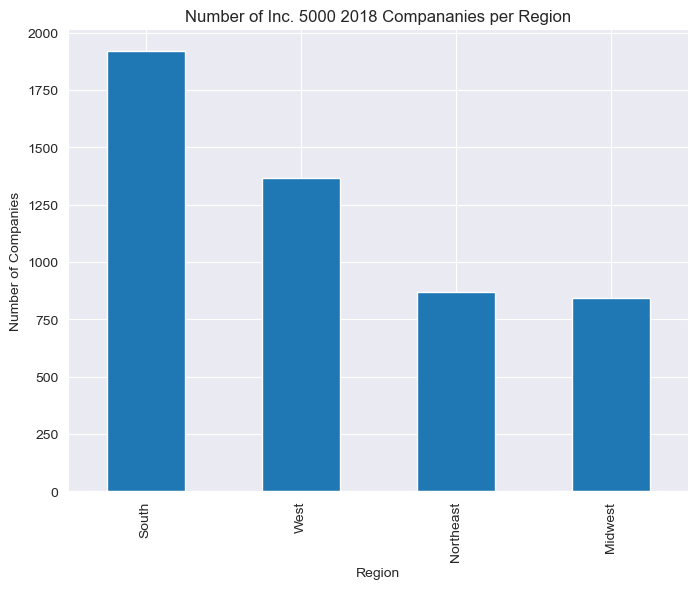

In [339]:
# plot the number of featured companies in each region
company_stats.plot(kind='bar', y='REGION', figsize=(8, 6));
plt.title('Number of Inc. 5000 2018 Compananies per Region')
plt.xlabel('Region')
plt.ylabel('Number of Companies')
plt.show()

I pledge on my honor that I have not given nor received any unauthorized assistance on this assignment
--Josephine ekenya